<H1>Introduction</h1>

<H3>Importing all the required tools and Reading the dataset</H3>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sales_df   =    pd.read_csv('Sales_Data.csv')

<H3>This is How the Dataset Looks like</H3>

In [2]:
sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Week_of_Year,Rainfall
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
34154,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34155,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34156,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34157,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,41,0.0


<H3>Quick overview</H3>

In [31]:
sales_df.isnull().sum()

Date                0
Product Name        0
Product Quantity    0
Units sold          0
Day                 0
Month               0
Year                0
DayOfWeek           0
Category            0
DayType             0
Week_of_Year        0
Rainfall            0
dtype: int64

<h3>Renaming the Dataframe and double checking that there are no null values</h3>

In [33]:
df= sales_df
df.dropna(inplace=True)

<h3>QUICK EDA</h3>

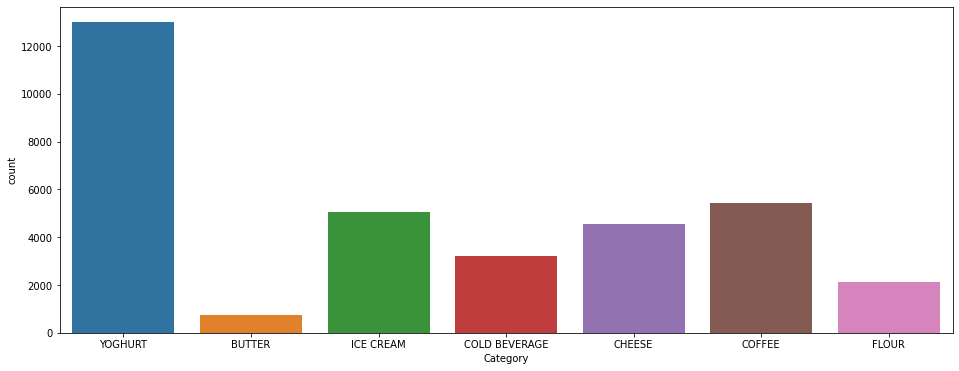

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(x='Category', data=df)
plt.show()

Plot shows the comparison between the categry of products available

C:\Users\Hammaad\AppData\Local\Temp/ipykernel_18664/3094159044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array


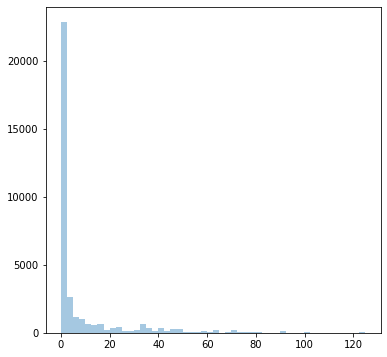

In [36]:
plt.figure(figsize=(6, 6))
sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array
plt.show()


Distribution of the rainfall along the dataset, many days had rainfall less than 12mm while there were server rainfalls till 100mm less frequently

<h1>Algorithm - Random Forrest Classifier Accuracy (37.5%)</h1> 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
df = sales_df
label_encoder = LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# Define features (X) and target variable (y)
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target = 'Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.3706088992974239


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       225
       CHEESE       0.04      0.00      0.00      1332
       COFFEE       0.18      0.01      0.02      1667
COLD BEVERAGE       0.12      0.00      0.01       959
        FLOUR       0.00      0.00      0.00       653
    ICE CREAM       0.20      0.02      0.04      1550
      YOGHURT       0.38      0.97      0.54      3862

     accuracy                           0.37     10248
    macro avg       0.13      0.14      0.09     10248
 weighted avg       0.22      0.37      0.21     10248



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is 37% using Random forrest classifier with 60 - 30 Train test split

<h2>Tuning Hyper Parameters</h2>

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3751463700234192


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.21      0.02      0.03      1095
COLD BEVERAGE       0.12      0.00      0.01       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.20      0.02      0.03      1056
      YOGHURT       0.38      0.97      0.55      2611

     accuracy                           0.38      6832
    macro avg       0.13      0.14      0.09      6832
 weighted avg       0.22      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is 37% using Random forrest classifier with 80 - 20 Train test split

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3754391100702576


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.21      0.02      0.03      1095
COLD BEVERAGE       0.00      0.00      0.00       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.20      0.02      0.03      1056
      YOGHURT       0.38      0.97      0.55      2611

     accuracy                           0.38      6832
    macro avg       0.11      0.14      0.09      6832
 weighted avg       0.21      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is improving at a negligible rate after doubling the no of descion trees

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3744145199063232


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.19      0.02      0.03      1095
COLD BEVERAGE       0.12      0.00      0.01       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.19      0.02      0.03      1056
      YOGHURT       0.38      0.96      0.55      2611

     accuracy                           0.37      6832
    macro avg       0.13      0.14      0.09      6832
 weighted avg       0.22      0.37      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy isnt affected significantly after tuning the no of decision trees used in the algorithm therefore all the possible hyper parameters are tuned therefore We should try another alogorithm

<h1>Algorithm - xGBoost Classifier Accuracy (38.19%)</h1>

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming 'df' is your DataFrame
# Make sure 'Category' column has the categorical labels

# Encode categorical features
label_encoder = LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# Encode the categorical target variable
df['Category'] = label_encoder.fit_transform(df['Category'])

# Define features (X) and target variable (y)
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target = 'Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.37719555035128804
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.24      0.01      0.02      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.19      0.02      0.03      1056
           6       0.38      0.98      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.12      0.14      0.09      6832
weighted avg       0.21      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy is 37% without tuning hyper parameters

<h2>Tuning Hyper Parameters</h2>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.37983021077283374
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.43      0.00      0.01      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.11      0.00      0.01      1056
           6       0.38      0.99      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.13      0.14      0.08      6832
weighted avg       0.23      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Using the golden triple values for the leaning rate. 37.9% after 0.1 learning rate

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.03)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.38129391100702575
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.00      0.00      0.00      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.15      0.00      0.00      1056
           6       0.38      1.00      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.08      0.14      0.08      6832
weighted avg       0.17      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy increased to 38% after lowering the learning rate

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.001, n_estimators=1000, max_depth=5)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.382172131147541
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.00      0.00      0.00      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00      1056
           6       0.38      1.00      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.05      0.14      0.08      6832
weighted avg       0.15      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy increased to 38.2% after lowering the learning rate and adding more decision trees

No luck need to get a better score.... Possible options to do:
- Plot the feautre importance
- Feature engineer new values around that feature
- Repeat!

<h2>Feature Importance</h2>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

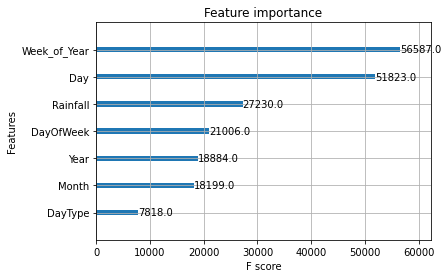

In [6]:
plot_importance(clf)

Day and WeekOfYear has a higher feature importance compared to the rest

<h2>Feature Engineering</h2>

Add a column for Average temperature for that day

<h2>Regression</h2>

generate ID to make records unique

In [53]:
sales_df["Id"]=range(1, len(sales_df) + 1)
sales_df=sales_df[['Id','Product Name', 'Product Quantity', 'Units sold', 'Day',
    'Month', 'Year', 'DayOfWeek', 'Category', 'DayType', 'Week_of_Year',
    'Rainfall']]

Explore the new dataset and split the categories into columns. then predict using Random forrest regressor and XGboost

In [27]:
sales_df["Product Name"].nunique()
df=sales_df

In [59]:
from sklearn.preprocessing import LabelEncoder

# assuming df is your DataFrame and 'product_name' is the column with the product names
le = LabelEncoder()
sales_df['Product Name'] = le.fit_transform(sales_df['Product Name'])

In [29]:
sales_df = sales_df[['Product Name', 'Product Quantity', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall','Units sold']]


In [30]:
sales_df

,Product Name,Product Quantity,Category,Day,Month,Year,DayOfWeek,DayType,Week_of_Year,Rainfall,Units sold
0,0,80ML,YOGHURT,2,1,2022,Sunday,Weekend,52,7.6,6
1,0,80ML,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,6
2,0,80ML,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,1
3,0,80ML,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,6
4,0,80ML,YOGHURT,2,1,2022,Sunday,Weekend,52,7.6,10
...,...,...,...,...,...,...,...,...,...,...,...
34154,11,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,12
34155,11,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,9
34156,11,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,13
34157,11,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,7


In [60]:
input_cols = ['Product Name', 'Product Quantity', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall']
target_col = 'Units sold'
inputs = sales_df[input_cols].copy()
targets = sales_df[target_col].copy()

split between nuemeric and categorical columns

In [61]:
numeric_cols = ['Product Name', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall']  # list of numeric columns
categorical_cols = ['Product Quantity', 'Category', 'DayOfWeek', 'DayType']  # list of categorical columns

<h1>Algorithm - XGBoost regressor (34.81)</h1>

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sales_df_encoded.drop('Units sold', axis=1), sales_df_encoded['Units sold'], test_size=0.2, random_state=42)
from xgboost import XGBRegressor

# Instantiate the XGBRegressor
model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)
# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to predict the test data
model = xgb.predict(X_test)


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 9.958309531714866
Mean Squared Error: 963.4146595882374
Root Mean Squared Error: 31.038921688554797


Use Feature Scaling for Numeric Values

Scale numeric values to the 0 to 1 range.

In [62]:
sales_df

,Id,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Week_of_Year,Rainfall
0,1,0,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
1,2,0,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
2,3,0,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
3,4,0,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
4,5,0,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
34154,34155,11,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34155,34156,11,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34156,34157,11,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34157,34158,11,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,41,0.0


In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

X = inputs[numeric_cols + encoded_cols]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
preds = model.predict(X)
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
rmse(preds, targets)

34.894892664731955

RMSE is 34.89

Feature importance

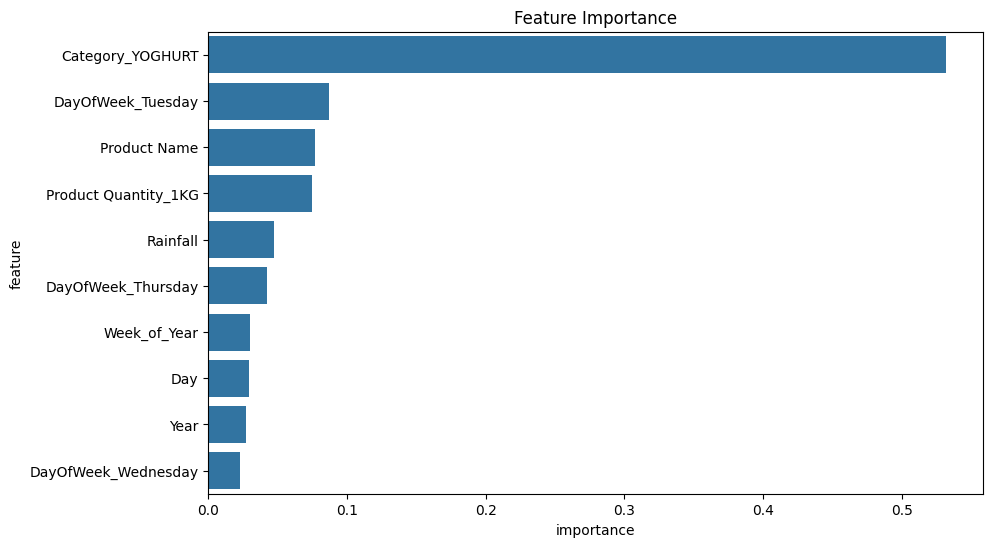

In [71]:

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [76]:
model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

model.fit(X, targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)

print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))




Train RMSE: 32.385233064807764, Validation RMSE: 27.987506303703764


<h2>Model is overfitting need to tune the hyper paramters</h2>

In [84]:
model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                     learning_rate=0.03, max_depth=10, subsample=0.9,  enable_categorical=True)

model.fit(X, targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)

print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


Train RMSE: 32.26949992391767, Validation RMSE: 28.375149824044843


Lowering the Learning rate

In [92]:
model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                     learning_rate=0.001, max_depth=5, subsample=0.9,  enable_categorical=True)

model.fit(X, targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)

print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


Train RMSE: 35.99837502310709, Validation RMSE: 35.598748578607776


Changing the TT split 

In [99]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.3)

model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.03, max_depth=10, subsample=0.9,  enable_categorical=True)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 26.02139172254215, Validation RMSE: 46.32187160070677


In [100]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.4)

model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.03, max_depth=10, subsample=0.9,  enable_categorical=True)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 32.03219367948336, Validation RMSE: 36.840783457107804


The model isnt overfitting it has a lower rmse compared to the validation set

In [101]:
X_val

,Product Name,Day,Month,Year,Week_of_Year,Rainfall,Product Quantity_1.5L,Product Quantity_100G,Product Quantity_120G,Product Quantity_1KG,...,Category_YOGHURT,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayType_Weekday,DayType_Weekend
15255,0.500000,0.500000,0.272727,1.0,0.274510,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29745,0.611111,0.233333,0.454545,0.0,0.431373,0.013611,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
21121,0.777778,0.700000,0.090909,1.0,0.137255,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29438,0.611111,0.200000,0.272727,0.0,0.254902,0.361890,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2573,0.000000,0.700000,0.272727,1.0,0.294118,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,0.777778,0.400000,0.000000,0.0,0.019608,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3667,0.000000,0.766667,0.818182,1.0,0.823529,0.002402,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19823,0.777778,0.433333,0.363636,0.0,0.352941,0.024019,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11222,0.500000,0.800000,0.181818,0.0,0.215686,0.000801,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
